# importing Dependencies


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# Data Collection and Analysis

In [6]:
# loading the dataset to a pandas Dataframe
diabetes_dataset = pd.read_csv('C:\\Users\Rajan Thakur\\OneDrive\\Desktop\\diabetes.csv')

In [7]:
#printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#no of rows and columns  in the dataset
diabetes_dataset.shape

(768, 9)

In [9]:
# let’ see that what are columns available in our dataset.
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#Information about the dataset

diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#getting the statical measures of the data
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#To know more about the dataset with transpose – here T is for the transpose

diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
#Now let’s check that if our dataset have null values or not

diabetes_dataset.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [14]:
#Now let’s check the number of null values our dataset has.

diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
diabetes_dataset_copy = diabetes_dataset.copy(deep = True)
diabetes_dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [16]:
## Showing the Count of NANs
print(diabetes_dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# DATA VISUALIZATION

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

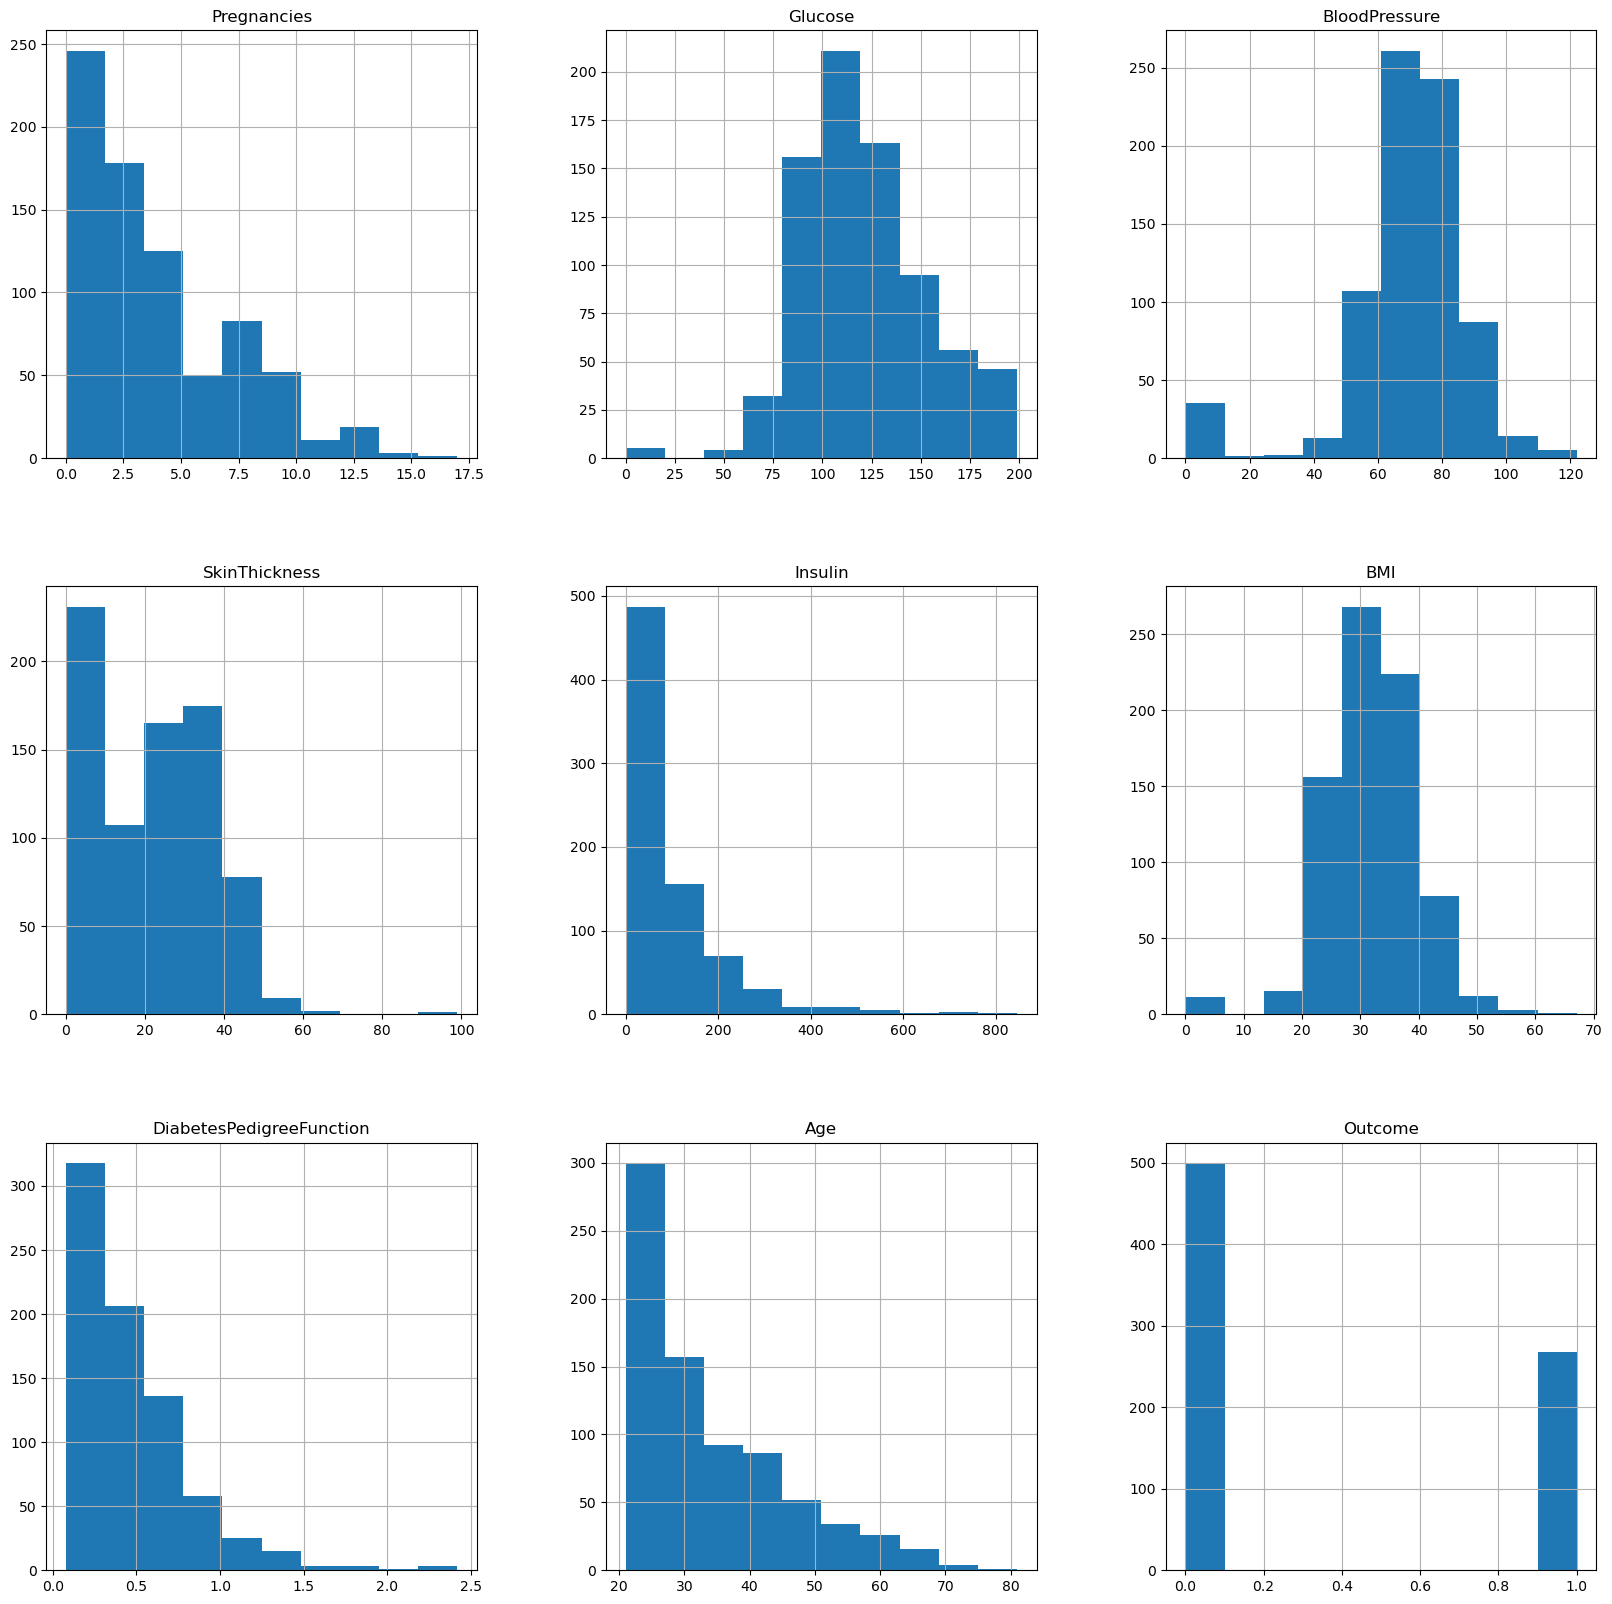

In [17]:
diabetes_dataset.hist(figsize = (20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: xlabel='Outcome'>

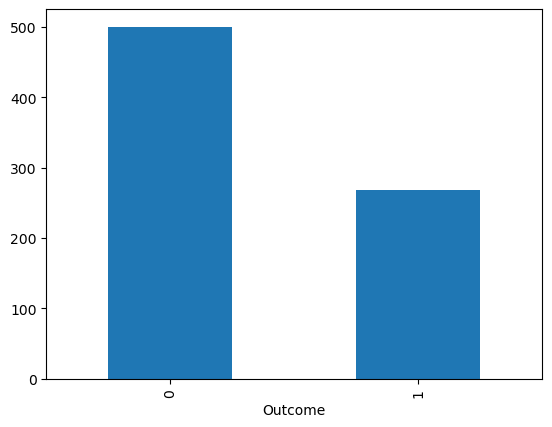

In [18]:
#let’s check that how well our outcome column is balanced

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_dataset["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_dataset.Outcome.value_counts())
diabetes_dataset.Outcome.value_counts().plot(kind="bar")

In [19]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# o denotes NON-Diabetic patient
# 1 denotes Diabetic patient

In [20]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


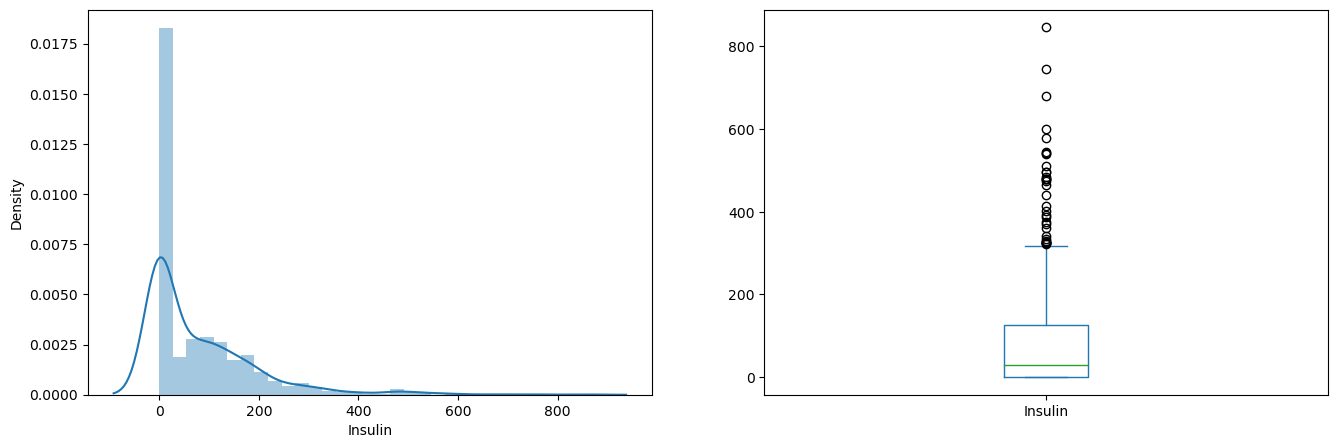

In [21]:
plt.subplot(121), sns.distplot(diabetes_dataset['Insulin'])
plt.subplot(122), diabetes_dataset['Insulin'].plot.box(figsize=(16,5))
plt.show()

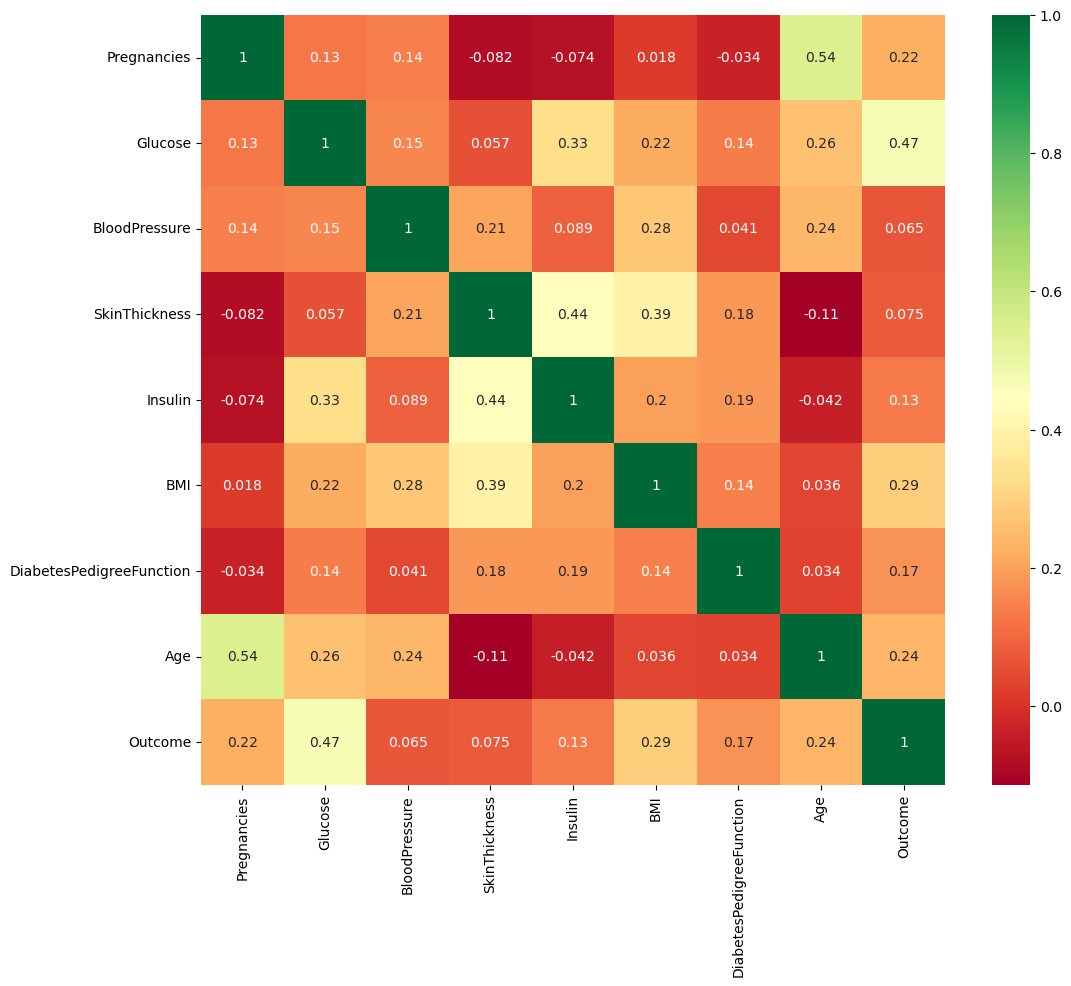

In [22]:
#Correlation between all the features before cleaning

plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_dataset.corr(), annot=True,cmap ='RdYlGn')

In [23]:
#seperating the data and the labels(we will be storing the outcome column  values into a seperate variable x and y )
x = diabetes_dataset.drop(columns='Outcome' , axis=1)
y = diabetes_dataset['Outcome']


In [24]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [25]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# data standardization

In [26]:
#scaler = StandardScaler()

In [27]:
#scaler.fit(x)

In [28]:
#standardised_data = scaler.transform(x)

In [29]:
#print(standardised_data)

# assigning/storing all the standarzied data into variable x and outcome column label/values into variable y

In [30]:
#x = standardised_data
#y = diabetes_dataset['Outcome']

In [31]:
# x represents the data  and y represents the models(to which we have to trained)
#print(x)
#print(y)

In [32]:
#split the data into training data  and text  data
#TRAIN_TEST_SPLIT

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size =0.2, stratify =y, random_state =2)

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


# TRAINING THE MODEL

In [34]:
classifier = svm.SVC(kernel='linear')

#training the suooort vector classifier 
classifier.fit(x_train, y_train)

SVC(kernel='linear')

# TESTING THE MODEL /MODEL EVALUATION 

In [35]:
#ACCURACY SCORE OF THE TRAINING DATA
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [36]:
print('ACCURACY SCORE OF THE TRAINING DATA:', training_data_accuracy)

ACCURACY SCORE OF THE TRAINING DATA: 0.7833876221498371


# TESTING THE MODEL ON   TEST DATA / UNKNOWN / NEVER SEEN BEFORE DATA

In [37]:
#ACCURACY SCORE OF THE TEST DATA
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [38]:
print('ACCURACY SCORE OF TEST DATA:' , test_data_accuracy)

ACCURACY SCORE OF TEST DATA: 0.7727272727272727


# MAKING THE PREDICTION SYSTEM  which will accept input from user and preict whether parient is Diabetic or not

In [39]:
#input_data =()

input_data =(4,110,92,0,0,37.6,0.191,30)

#we will change the input data from user  to numpy_ARRAY because its easy to process and it is efficient 
input_data_as_numpy_array = np.asarray(input_data)

# we need to reshape the ARRAY as we are predicting for just one instance  at one time
#as my model is trained on 768 ROWS or data points so my MODEL will accept 768 input row\data set  
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


#we will standardize the input data
#std_input_data = scaler.transform(input_data_reshaped)
print(input_data_reshaped)


[[  4.    110.     92.      0.      0.     37.6     0.191  30.   ]]


In [40]:
# we will PREDICT the outcome based upon Standard input data 
prediction = classifier.predict(input_data_reshaped)
print(prediction)

[0]


In [41]:
if(prediction[0] == 0):
    print('The person is Non-Diabetic')
else:
    print('The Person is Diabetic')
       

The person is Non-Diabetic


# SAVING THE TRAINED MODEL

In [42]:
import pickle

In [43]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [44]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [46]:

input_data =(4,110,92,0,0,37.6,0.191,30)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
    print('The person is Non-Diabetic')
else:
    print('The Person is Diabetic')



[0]
The person is Non-Diabetic
